<a id="top"></a>

### 0. Import libraries

[back to top](#top)

In [74]:
import pandas as pd
import numpy as np

#matplotlib inline

### 1. Import Data

[back to top](#top)

In [75]:
# Read the Parquet file

taxi_jan_2019 = pd.read_parquet('data/yellow_tripdata_2019-01.parquet')
taxi_data = pd.concat([taxi_jan_2019])

In [76]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,NaN


In [77]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [78]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 
        'DOLocationID', 'payment_type', 'total_amount']]

In [79]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

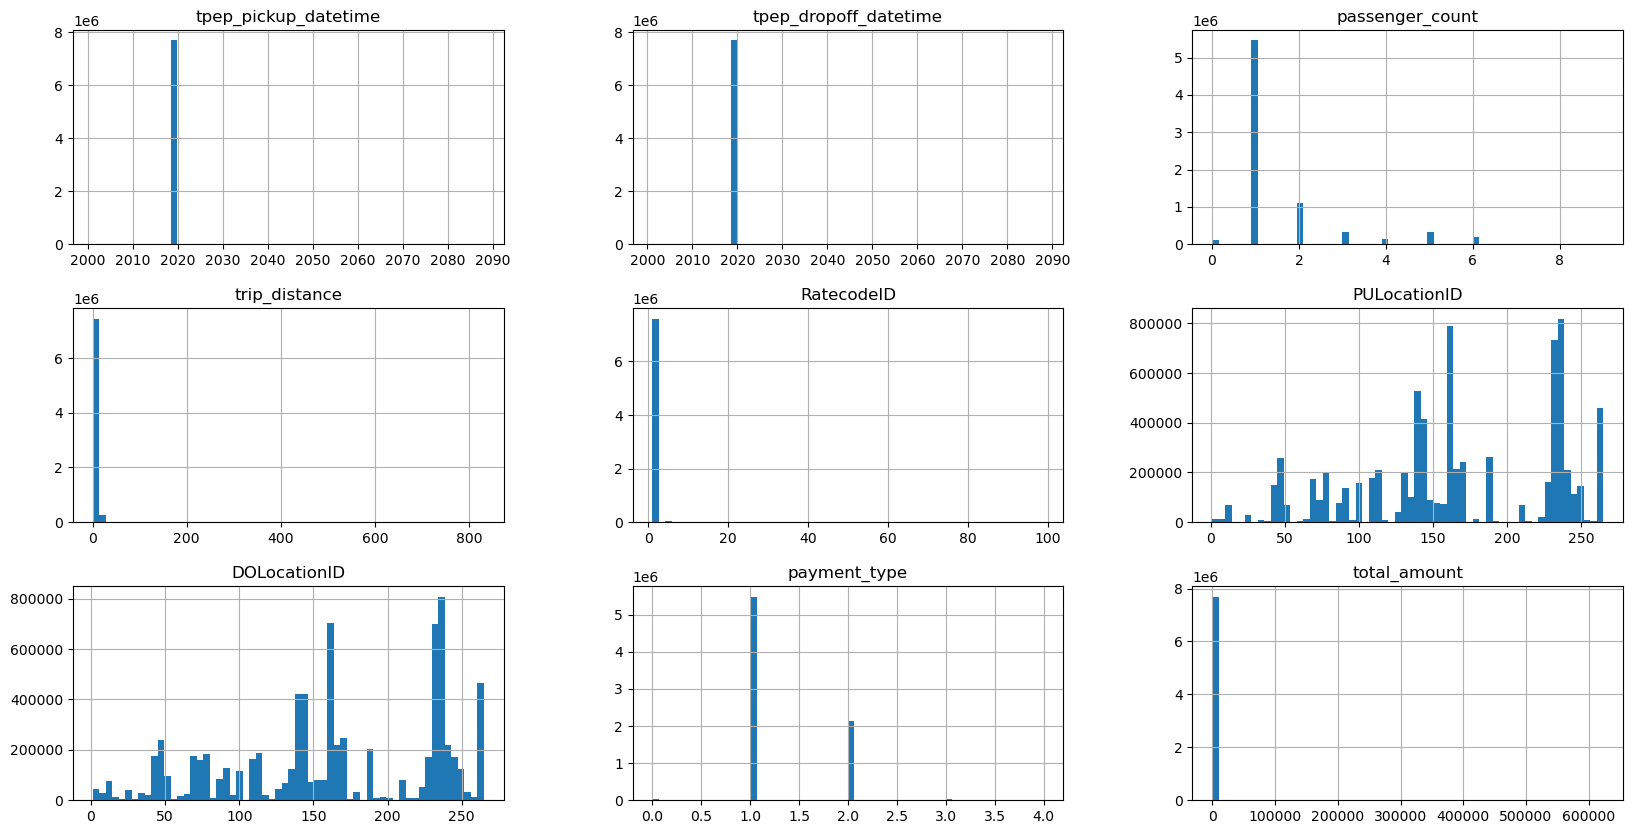

In [80]:
taxi_data.hist(figsize=(20,10), bins=60)

In [81]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

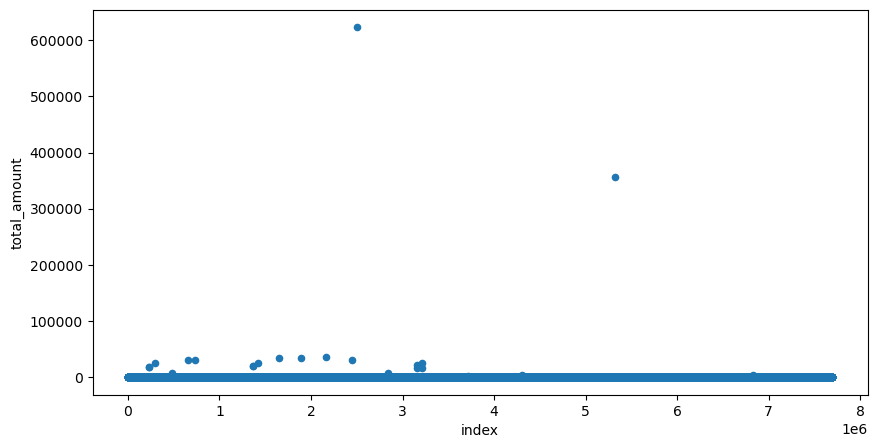

In [82]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10, 5))

<Axes: xlabel='index', ylabel='total_amount'>

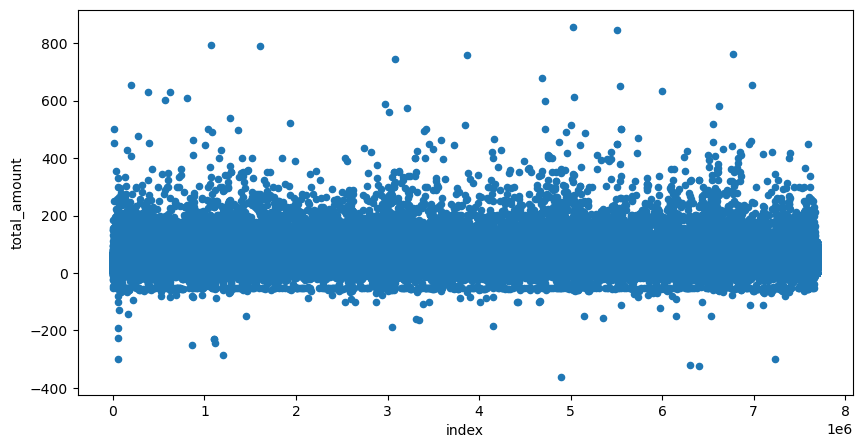

In [83]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

Two things to deal with: negative values and very high values. Let's first look at negative values.

(7127, 9)


<Axes: xlabel='index', ylabel='total_amount'>

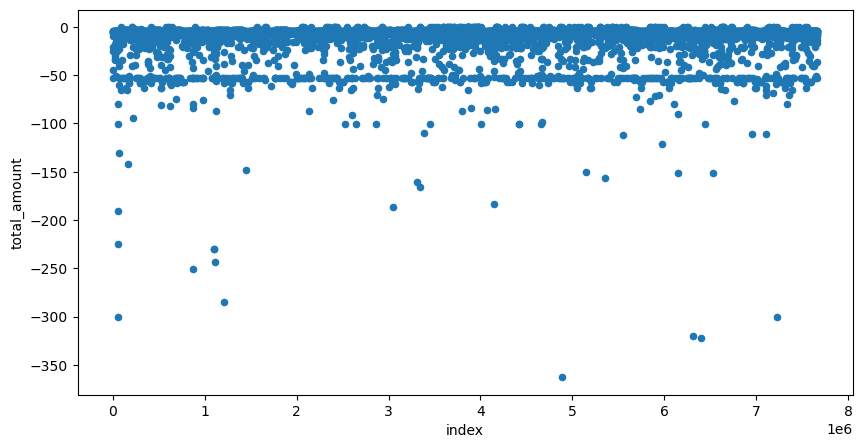

In [84]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [85]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [86]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

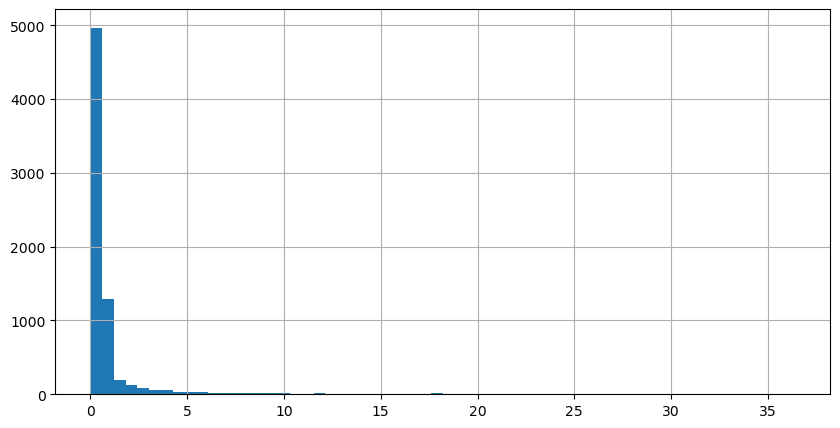

In [87]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [88]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [89]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<Axes: >

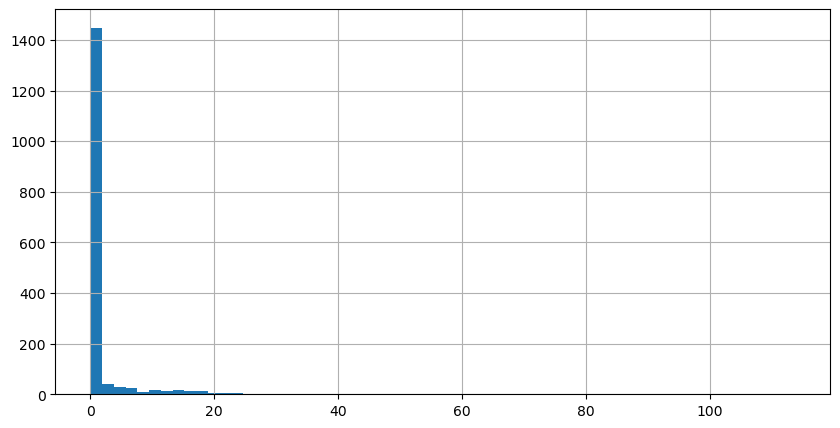

In [90]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [91]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

<Axes: >

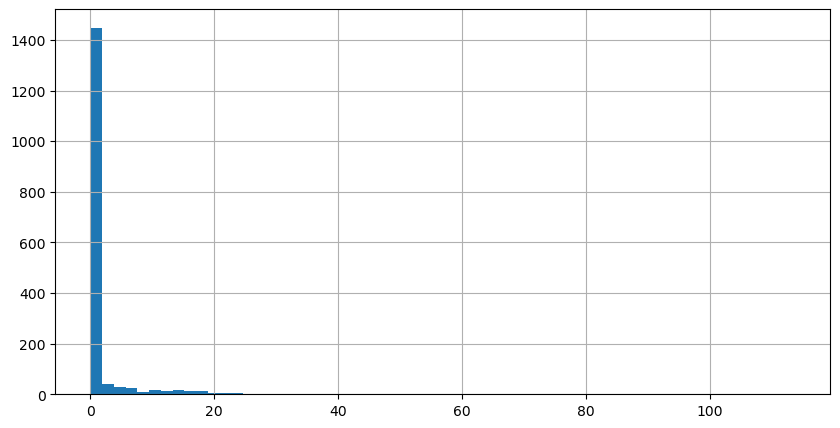

In [92]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10, 5))

We can safely get rid of the negative values. What about the very high values?

<Axes: xlabel='index', ylabel='total_amount'>

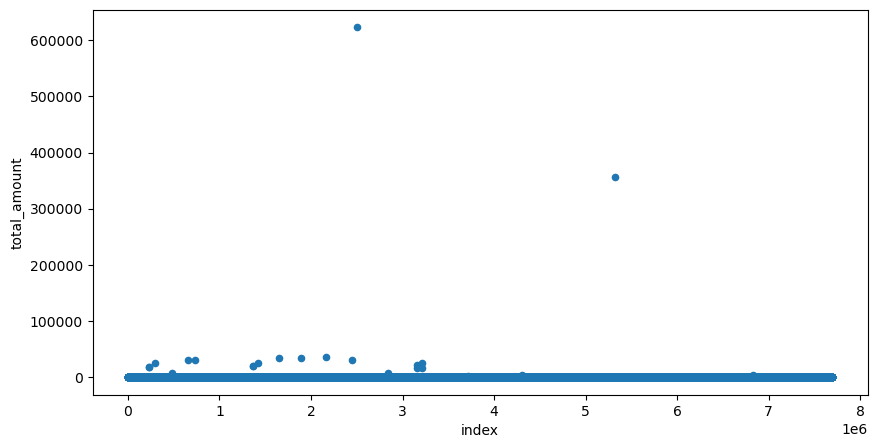

In [93]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [94]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [95]:
taxi_data['total_amount'].mean()

15.810651344610214

We can agree to cut from $200 level.

### 3. Data cleaning
[back to top](#top)

In [96]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [97]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7696617, 9)


(7688319, 9)

Checking for missing values

In [98]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

Dealing with missing values

In [99]:
print("Initial DataFrame Shape: ", taxi_data.shape)
print("Initial missing values: ", taxi_data.isnull().sum().sum())

Initial DataFrame Shape:  (7696617, 9)
Initial missing values:  57344


I noticed that I have misisng values in two columns, "passenger_count" and "RatecodeID". I decided to proceed with median imputation of values for the first column and mode imputation of values for the second column. It easier to implement, preserves the dataset size and it seems more appropriate in that case, in my opinion.  

In [100]:
# Initial state
print("Initial DataFrame shape:", taxi_data.shape)
print("\nInitial missing values:\n\n", taxi_data.isnull().sum())

# Impute Passenger_count with median
passenger_count_median = taxi_data['passenger_count'].median()
taxi_data['passenger_count'].fillna(passenger_count_median, inplace=True)

# Impute RateCodeID with mode
RatecodeID_mode = taxi_data['RatecodeID'].mode()[0]
taxi_data['RatecodeID'].fillna(RatecodeID_mode, inplace=True)

# Verify the result
print("\nMissing values after imputation:\n\n", taxi_data.isnull().sum())

Initial DataFrame shape: (7696617, 9)

Initial missing values:

 tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64


C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\1304354560.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi_data['passenger_count'].fillna(passenger_count_median, inplace=True)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\1304354560.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always


Missing values after imputation:

 tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64


### 4. Data preparation

[back to top](#top)

In [101]:
taxi_data_prepared = taxi_data_filtered.copy()

In [102]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

Making sure everything is on the right type

In [103]:
taxi_data_prepared.loc[:,'tpep_pickup_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:,'tpep_pickup_datetime'])
taxi_data_prepared.loc[:,'tprp_dropoff_datetime'] = pd.to_datetime(taxi_data_prepared.loc[:, 'tpep_dropoff_datetime'])

We have encountered an error, IntCastingNaNError, which occurs because there are missing or non-finite values (NaN or infinity) in the passenger_count column, which prevents them from being converted directly to integers.

To resolve this, you can do the following:

In [104]:
import numpy as np

taxi_data_prepared['passenger_count'] = taxi_data_prepared['passenger_count'].replace([np.inf, -np.inf], np.nan)
taxi_data_prepared['passenger_count'] = taxi_data_prepared['passenger_count'].fillna(0).astype('int64')

In [105]:
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared.loc[:, 'RatecodeID'].astype(str)
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared.loc[:, 'PULocationID'].astype(str)
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared.loc[:, 'DOLocationID'].astype(str)
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared.loc[:, 'payment_type'].astype(str)
taxi_data_prepared['passenger_count'] = taxi_data_prepared['passenger_count'].astype('int64')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\1155398905.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... 'nan' 'nan' 'nan']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared.loc[:, 'RatecodeID'].astype(str)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\1155398905.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['151' '239' '236' ... '159' '265' '237']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared.loc[:, 'PULocationID'].astype(str)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\1155398905.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of

In [106]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
tprp_dropoff_datetime    datetime64[ns]
dtype: object

Transforming variables into the formats we need them.

In [107]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,tprp_dropoff_datetime
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1.0,151,239,1,9.95,2019-01-01 00:53:20
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1.0,239,246,1,16.30,2019-01-01 01:18:59
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1.0,236,236,1,5.80,2018-12-21 13:52:40
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1.0,193,193,2,7.55,2018-11-28 15:55:45
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2.0,193,193,2,55.55,2018-11-28 15:58:33


In [108]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
# -> We make it datetime again because it's very little use when it's a just a string (can't compare, short, etc.)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour


In [109]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,tprp_dropoff_datetime,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1.0,151,239,1,9.95,2019-01-01 00:53:20,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1.0,239,246,1,16.30,2019-01-01 01:18:59,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1.0,236,236,1,5.80,2018-12-21 13:52:40,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1.0,193,193,2,7.55,2018-11-28 15:55:45,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2.0,193,193,2,55.55,2018-11-28 15:58:33,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'tprp_dropoff_datetime'}>],
       [<Axes: title={'center': 'transaction_date'}>,
        <Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>],
       [<Axes: title={'center': 'transaction_day'}>,
        <Axes: title={'center': 'transaction_hour'}>, <Axes: >]],
      dtype=object)

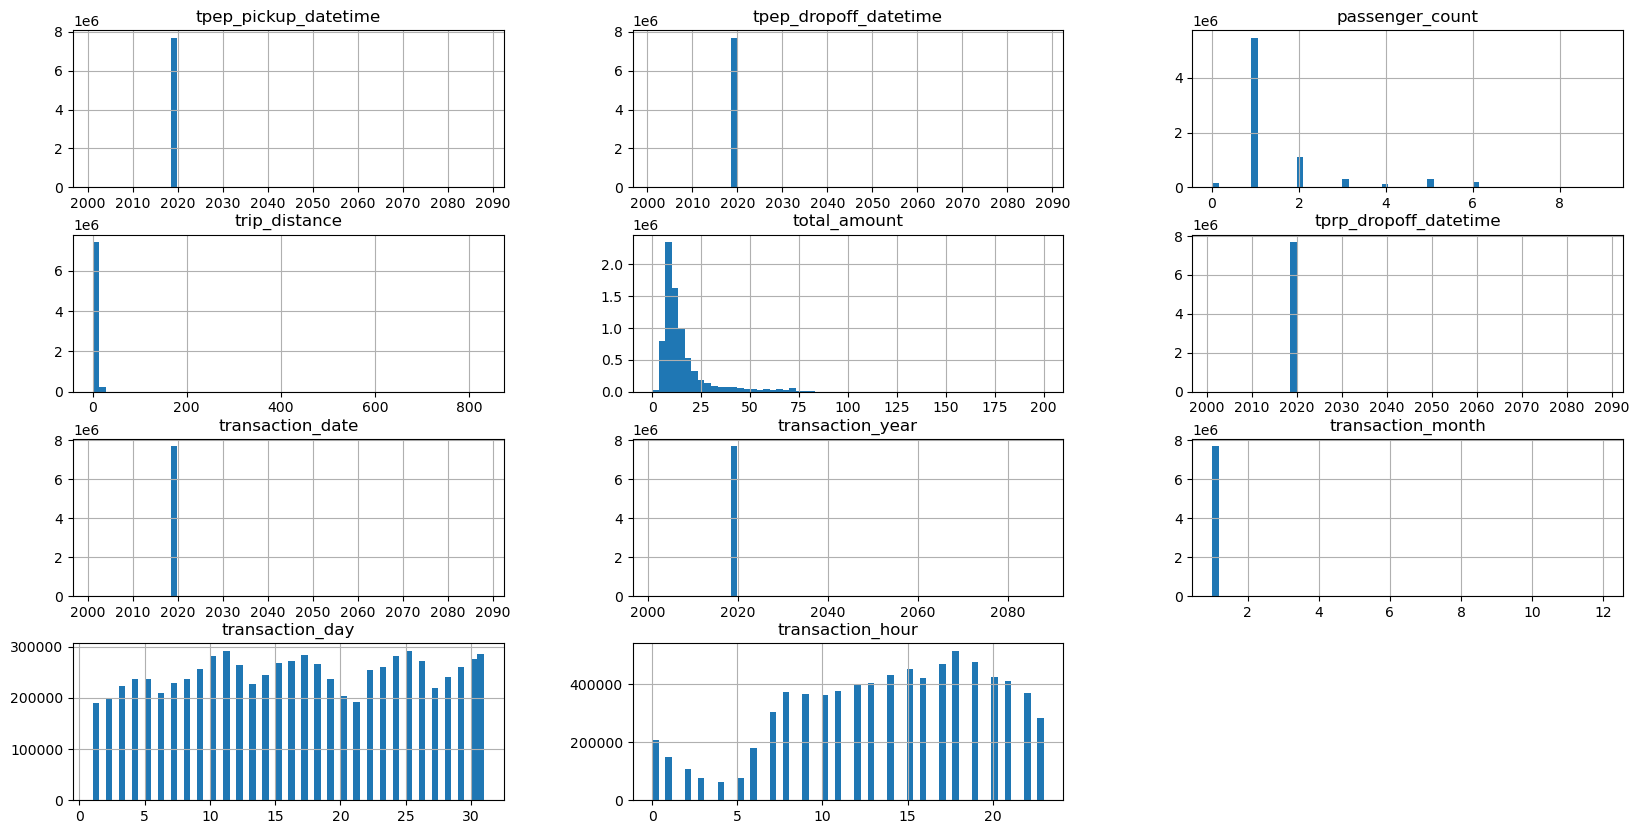

In [110]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

In [111]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

Noting down categorical and numerical columns

In [112]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [113]:
main_taxi_data = taxi_data_prepared[all_needed_columns]
print(main_taxi_data.shape)
main_taxi_data.head()

(7687783, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [114]:
# Aggregate data points. Now is a good time to think about what we want to predict. Depending on this, we need to transform our data to have a certain format. 

taxi_grouped_by_region = main_taxi_data.groupby(categorical_columns).mean().reset_index() # type: ignore
taxi_grouped_by_region['count_of_transactions'] = main_taxi_data.groupby(categorical_columns).count().reset_index()['total_amount'] # type: ignore
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102713, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


Aggregate data points
Now is a good time to think about what we want to predict. Depending on this, we need to transform our data to have a certain format.

In [115]:
taxi_grouped_by_region = main_taxi_data.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_data.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102713, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<Axes: >

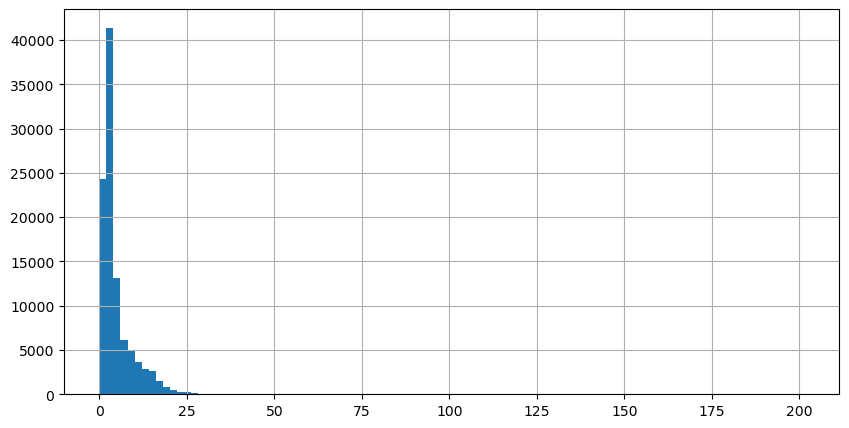

In [116]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5)) # type: ignore

<Axes: >

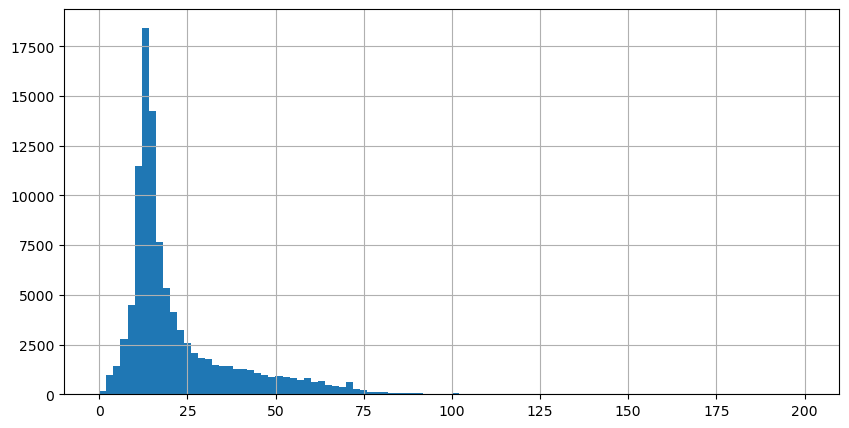

In [117]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

### 5. Benchmark model

[back to top](#top)

In [118]:
data_for_benchmark_model = taxi_grouped_by_region.copy() # type: ignore

In [119]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

#### 5.1 Train-test split

In [120]:
from sklearn.model_selection import train_test_split # type: ignore

x_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encoding
x_bench = pd.get_dummies(x_bench)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)

#### 5.2 Fit the model to the data

In [121]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_train_b, y_train_b) # type: ignore

DecisionTreeRegressor(max_depth=10)

#### 5.3 Model evaluation

In [122]:
model_at_hand = tree 

y_pred_b = model_at_hand.predict(x_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))



mean_absolute_error 3.3728417374599133
mean_squared_error 60.16255314490258
root_mean_squared_error 7.756452355613524
r2 0.7955422761057057


<Axes: xlabel='true', ylabel='pred'>

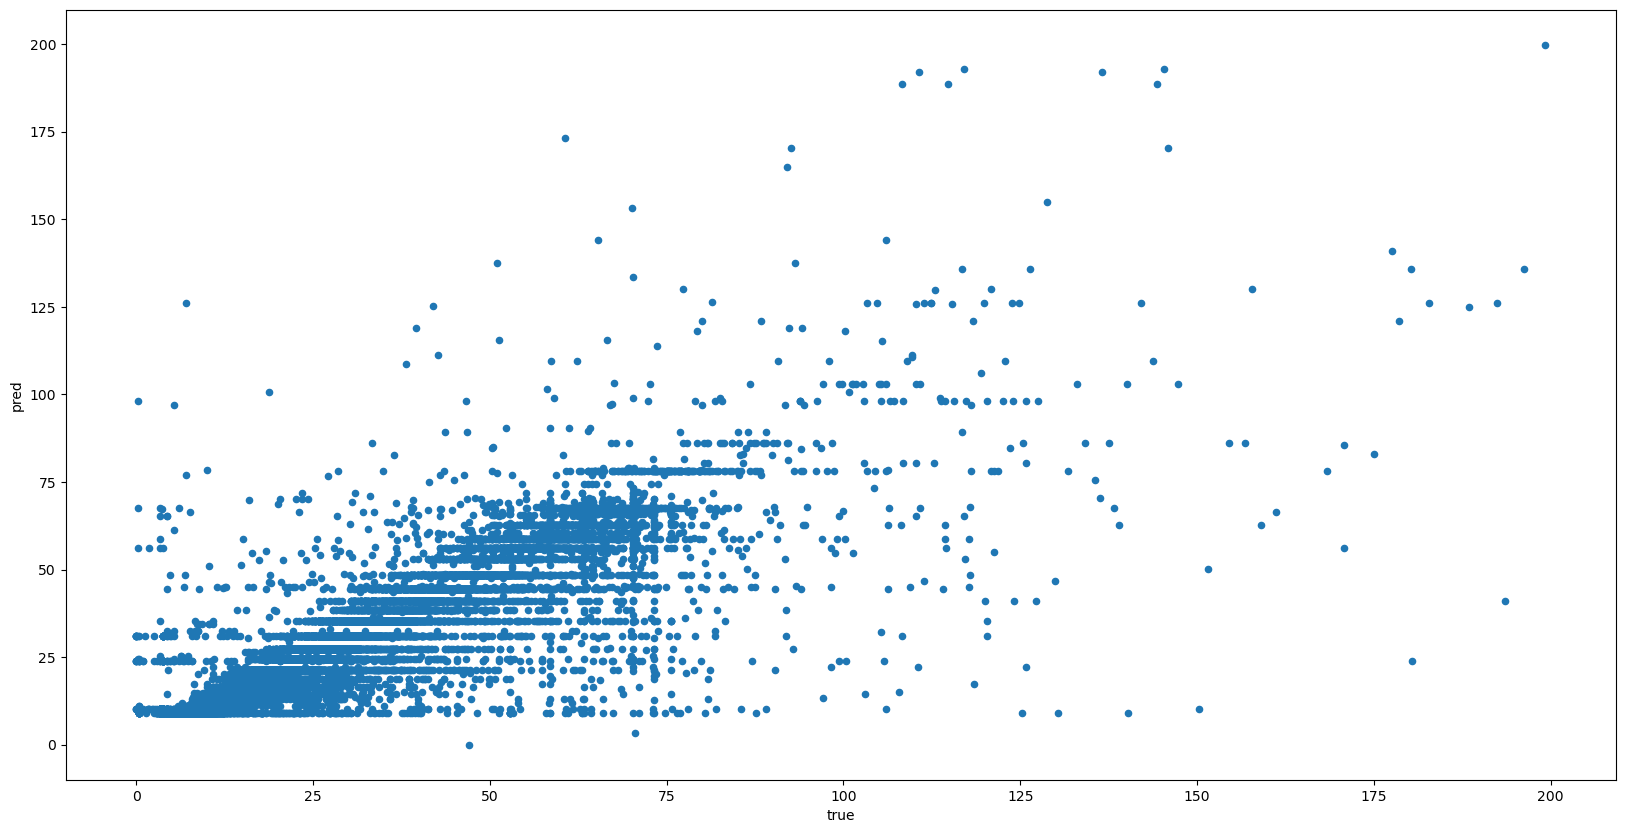

In [123]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

#### 5.4 Fix problems

In [124]:
categorical_features_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark
target_features_benchmark = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
x_bench = pd.get_dummies(x_bench)

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size=0.33, random_state=42)

# Fir a model
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 10.706537101412541
mean_squared_error 241.34940048667102
root_mean_squared_error 15.535424052360819
r2 0.17979296909313147


<Axes: xlabel='true', ylabel='pred'>

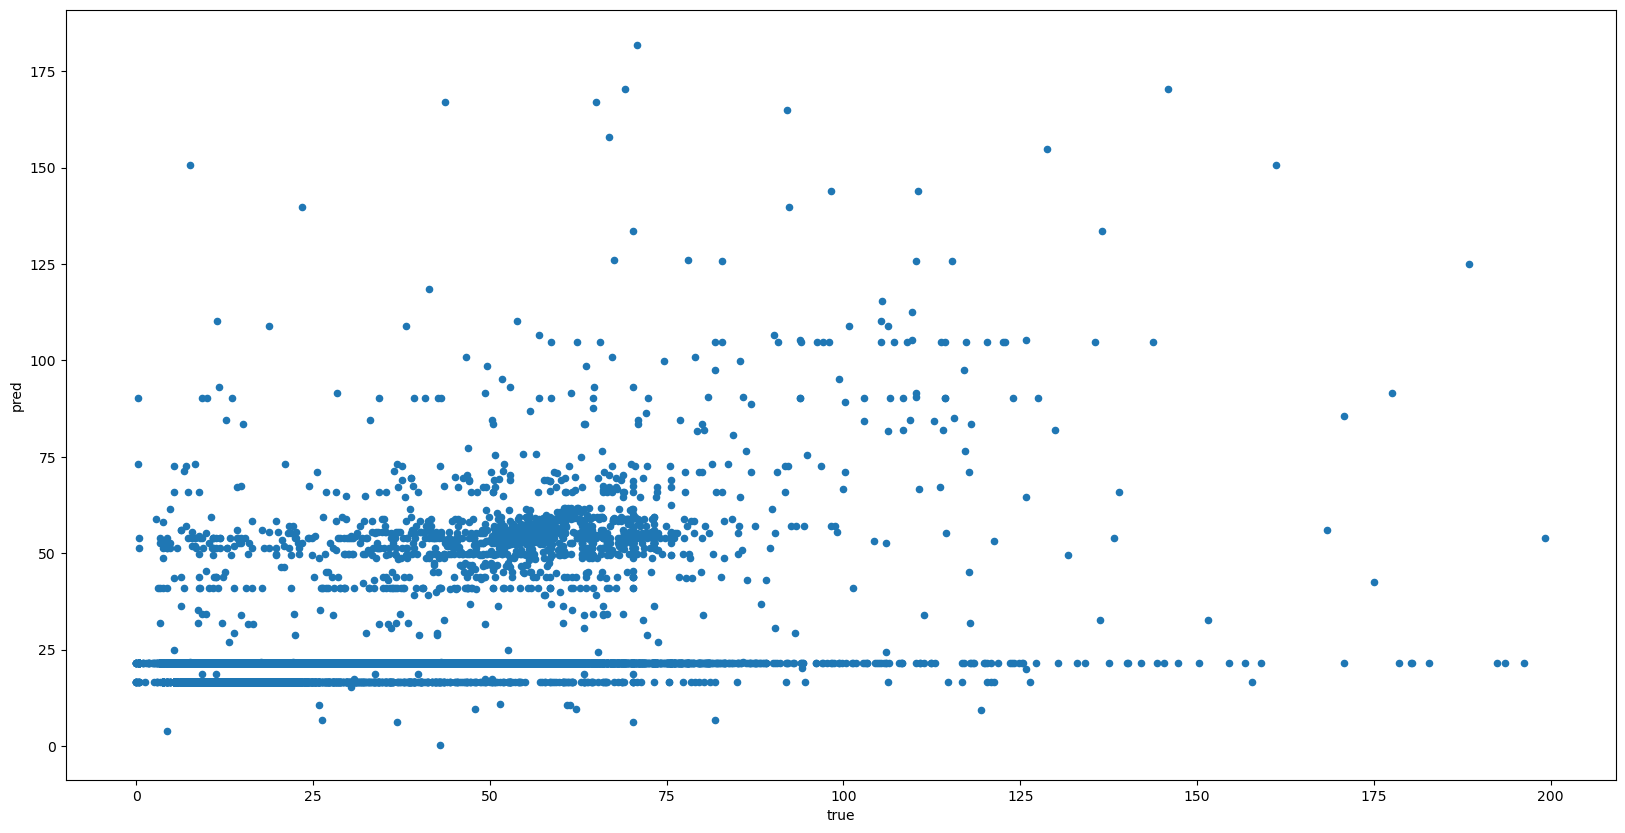

In [125]:
data = {'true':y_test_b, 'pred':y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20, 10), kind='scatter', x='true', y='pred')

### 6. Feature engineering

[back to top](#top)

In [126]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [127]:
data_with_new_features = taxi_grouped_by_region.copy()

Data-related features

In [128]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [129]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018', end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\264355833.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)


In [130]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


In [131]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID', 'Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [137]:
data_with_new_features = data_with_new_features.merge(zone_lookup, how='left', left_on='PULocationID', right_on='LocationID')
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID_x,Borough_x,LocationID_pickup,Borough_pickup,LocationID_y,Borough_y,LocationID,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR


In [138]:
data_with_new_features['Borough_x'].value_counts()

Borough_x
Manhattan        45315
Brooklyn         23721
Queens           22000
Bronx             9649
Unknown            744
Staten Island      304
EWR                271
Name: count, dtype: int64

**Weather related features**

In [192]:
nyc_weather = pd.read_csv('data/NYC_Weather_2016_2022.csv')
nyc_weather.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0


In [193]:
nyc_weather.shape

(59760, 10)

In [194]:
nyc_weather.dtypes

time                      object
temperature_2m (°C)      float64
precipitation (mm)       float64
rain (mm)                float64
cloudcover (%)           float64
cloudcover_low (%)       float64
cloudcover_mid (%)       float64
cloudcover_high (%)      float64
windspeed_10m (km/h)     float64
winddirection_10m (°)    float64
dtype: object

In [195]:
nyc_weather['cloudcover (%)'].value_counts()

cloudcover (%)
100.0    11539
0.0       9345
30.0      1543
1.0       1409
29.0      1108
         ...  
73.0       189
67.0       183
75.0       177
97.0       165
99.0       151
Name: count, Length: 101, dtype: int64

In [196]:
nyc_weather['precipitation (mm)'].value_counts()

precipitation (mm)
0.0     50970
0.2      1244
0.1      1226
0.3       840
0.4       613
        ...  
7.4         1
9.6         1
6.2         1
19.2        1
5.7         1
Name: count, Length: 92, dtype: int64

In [197]:
nyc_weather.isna().sum()

time                       0
temperature_2m (°C)      168
precipitation (mm)       168
rain (mm)                168
cloudcover (%)           168
cloudcover_low (%)       168
cloudcover_mid (%)       168
cloudcover_high (%)      168
windspeed_10m (km/h)     168
winddirection_10m (°)    173
dtype: int64

In [203]:
nyc_weather['precipitation (mm)'] = nyc_weather['precipitation (mm)'].replace('Trace of precipitation', 0.01)
nyc_weather['precipitation (mm)'] = nyc_weather['precipitation (mm)'].astype(float)

# option 1
# ny_weather['precipitation (mm)'].fillna(0, inplace=True)

# option 2
# ny_weather['precipitation (mm)'].fillna(method='ffill', inplace=True)

# option 3
nyc_weather['precipitation (mm)'].interpolate(method='linear', inplace=True)

# nyc_weatherprecipitation = nyc_weather['precipitation (mm)'].mean()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\1413418249.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_weather['precipitation (mm)'].interpolate(method='linear', inplace=True)


In [210]:
nyc_weather['cloudcover (%)'] = nyc_weather['cloudcover (%)'].replace('70 - 80%', 0.7)
nyc_weather['cloudcover (%)'] = nyc_weather['cloudcover (%)'].replace('100%', 1)
nyc_weather['cloudcover (%)'] = nyc_weather['cloudcover (%)'].replace('20 - 30%', 0.3)
nyc_weather['cloudcover (%)'] = nyc_weather['cloudcover (%)'].replace('50%', 0.5)
nyc_weather['cloudcover (%)'] = nyc_weather['cloudcover (%)'].replace('no clouds', 0)
nyc_weather['cloudcover (%)'] = nyc_weather['cloudcover (%)'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloudcover (%)'] = nyc_weather['cloudcover (%)'].astype(float)
nyc_weather['cloudcover (%)'].interpolate(inplace=True)


C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\2159555647.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_weather['cloudcover (%)'].interpolate(inplace=True)


In [211]:
nyc_weather.dtypes

time                      object
temperature_2m (°C)      float64
precipitation (mm)       float64
rain (mm)                float64
cloudcover (%)           float64
cloudcover_low (%)       float64
cloudcover_mid (%)       float64
cloudcover_high (%)      float64
windspeed_10m (km/h)     float64
winddirection_10m (°)    float64
dtype: object

DataFrame is not properly converted to a datetime format, or there might be values in the column that cannot be interpreted as dates or times.

In [219]:
# Check the current data type of the 'time' column:
print(nyc_weather['time'].dtype)

datetime64[ns]


In [220]:
# Handle conversion errors:
nyc_weather['time'] = pd.to_datetime(nyc_weather['time'], errors='coerce')

In [221]:
# Check for any invalid values:
print(nyc_weather[nyc_weather['time'].isna()])

Empty DataFrame
Columns: [time, temperature_2m (°C), precipitation (mm), rain (mm), cloudcover (%), cloudcover_low (%), cloudcover_mid (%), cloudcover_high (%), windspeed_10m (km/h), winddirection_10m (°), hour, month, day]
Index: []


In [224]:
# Proceed with extracting hour, month, and day:
nyc_weather.loc[:, 'time'] = pd.to_datetime(nyc_weather.loc[:, 'time'])
nyc_weather['hour'] = nyc_weather['time'].dt.hour
nyc_weather['month'] = nyc_weather['time'].dt.month
nyc_weather['day'] = nyc_weather['time'].dt.day

In [225]:
nyc_weather.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour,month,day
0,2016-01-01 00:00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0,0,1,1
1,2016-01-01 01:00:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0,1,1,1
2,2016-01-01 02:00:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0,2,1,1
3,2016-01-01 03:00:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0,3,1,1
4,2016-01-01 04:00:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0,4,1,1


In [226]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID_x,Borough_x,LocationID_pickup,Borough_pickup,LocationID_y,Borough_y,LocationID,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,1,EWR,1,EWR,1,EWR,1,EWR


In [239]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on=['transaction_month', 'transaction_day', 'transaction_hour'], right_on=['month', 'day', 'hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(718991, 32)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.8,1,1,False,...,0.0,32.0,3.0,0.0,99.0,9.7,285.0,2,1,1
1,1,2019-01-01,1,1,2,0.0,21.8,1,1,False,...,0.0,75.0,1.0,96.0,54.0,16.0,211.0,2,1,1
2,1,2019-01-01,1,1,2,0.0,21.8,1,1,False,...,0.0,0.0,0.0,0.0,0.0,12.3,302.0,2,1,1
3,1,2019-01-01,1,1,2,0.0,21.8,1,1,False,...,2.4,100.0,100.0,100.0,100.0,17.3,126.0,2,1,1
4,1,2019-01-01,1,1,2,0.0,21.8,1,1,False,...,0.0,100.0,46.0,97.0,12.0,11.4,252.0,2,1,1


In [240]:
# nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['LocationID', 'hour', 'month', 'day'], axis=1)

In [234]:
nyc_taxi_with_weather.isna().sum()

PULocationID                0
transaction_date            0
transaction_month           0
transaction_day             0
transaction_hour            0
trip_distance               0
total_amount                0
count_of_transactions       0
transaction_week_day        0
weekend                     0
is_holiday                  0
LocationID_x                0
Borough_x                4963
LocationID_pickup           0
Borough_pickup           4963
LocationID_y                0
Borough_y                4963
LocationID                  0
Borough                  4963
time                        0
temperature_2m (°C)         0
precipitation (mm)          0
rain (mm)                   0
cloudcover (%)              0
cloudcover_low (%)          0
cloudcover_mid (%)          0
cloudcover_high (%)         0
windspeed_10m (km/h)        0
winddirection_10m (°)     141
hour                        0
month                       0
day                         0
dtype: int64

In [242]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date', 'transaction_hour']).reset_index(drop=True)

In [243]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\1400942564.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_16036\1400942564.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')


PULocationID             0
transaction_date         0
transaction_month        0
transaction_day          0
transaction_hour         0
trip_distance            0
total_amount             0
count_of_transactions    0
transaction_week_day     0
weekend                  0
is_holiday               0
LocationID_x             0
Borough_x                0
LocationID_pickup        0
Borough_pickup           0
LocationID_y             0
Borough_y                0
LocationID               0
Borough                  0
time                     0
temperature_2m (°C)      0
precipitation (mm)       0
rain (mm)                0
cloudcover (%)           0
cloudcover_low (%)       0
cloudcover_mid (%)       0
cloudcover_high (%)      0
windspeed_10m (km/h)     0
winddirection_10m (°)    0
hour                     0
month                    0
day                      0
dtype: int64

In [244]:
nyc_taxi_with_weather.head()   

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour,month,day
0,10,2019-01-01,1,1,0,3.02,14.3,2,1,False,...,0.0,69.0,53.0,0.0,72.0,10.0,296.0,0,1,1
1,10,2019-01-01,1,1,0,3.02,14.3,2,1,False,...,0.0,90.0,0.0,100.0,99.0,19.2,208.0,0,1,1
2,10,2019-01-01,1,1,0,3.02,14.3,2,1,False,...,0.0,0.0,0.0,0.0,0.0,9.4,302.0,0,1,1
3,10,2019-01-01,1,1,0,3.02,14.3,2,1,False,...,1.8,100.0,100.0,100.0,99.0,14.4,122.0,0,1,1
4,10,2019-01-01,1,1,0,3.02,14.3,2,1,False,...,0.0,78.0,23.0,96.0,0.0,9.2,206.0,0,1,1


### 7. Model training

In [245]:
data_for_model = nyc_taxi_with_weather.copy()

In [252]:
nyc_weather.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°),hour,month,day
0,2016-01-01 00:00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0,0,1,1
1,2016-01-01 01:00:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0,1,1,1
2,2016-01-01 02:00:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0,2,1,1
3,2016-01-01 03:00:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0,3,1,1
4,2016-01-01 04:00:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0,4,1,1


**train-test split**

In [256]:
from sklearn.model_selection import train_test_split

x = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### 7.1 Decision tree

In [274]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=150)
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=150)

In [275]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 0.0717778710084282
mean_squared_error 3.356245228971629
root_mean_squared_error 1.832005793924143
r2 0.9886129299875444


<Axes: xlabel='true', ylabel='pred'>

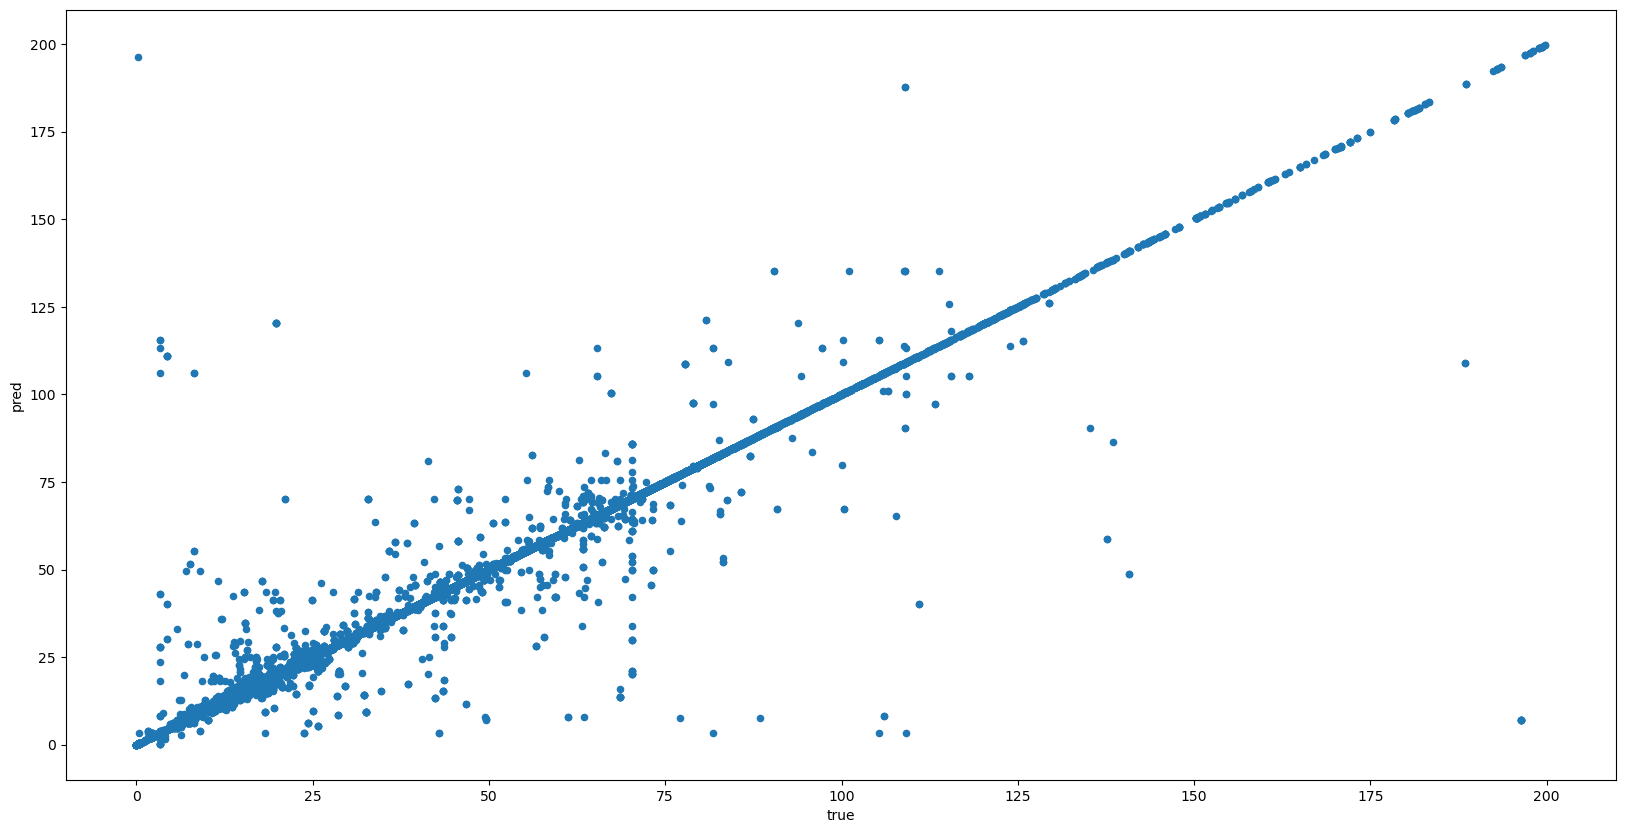

In [276]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

**Overfitting**

The model fits the training data's pattern so much that it loses the ability to generalise

In [277]:
x_train_overfit = x_train
y_train_overfit = y_train

x_test_overfit = x_test
y_test_overfit = y_test

In [278]:
rmse_scores = {'max_depth':[], 'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(x_train_overfit, y_train_overfit)

    model_at_hand_overfit = decision_tree_overfit

    y_pred_train = model_at_hand_overfit.predict(x_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))

    y_pred_test = model_at_hand_overfit.predict(x_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))

    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [272]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.044384e+01,10.439434
1,5,7.875008e+00,7.891828
2,8,7.039990e+00,7.149342
3,10,6.501541e+00,6.693320
4,15,5.258058e+00,5.632495
5,20,4.309933e+00,4.789424
6,30,2.804957e+00,3.388417
7,50,8.712675e-01,2.168795
8,70,1.393681e-01,1.843091
9,100,1.100959e-03,1.854567


Text(0, 0.5, 'root mean squared error')

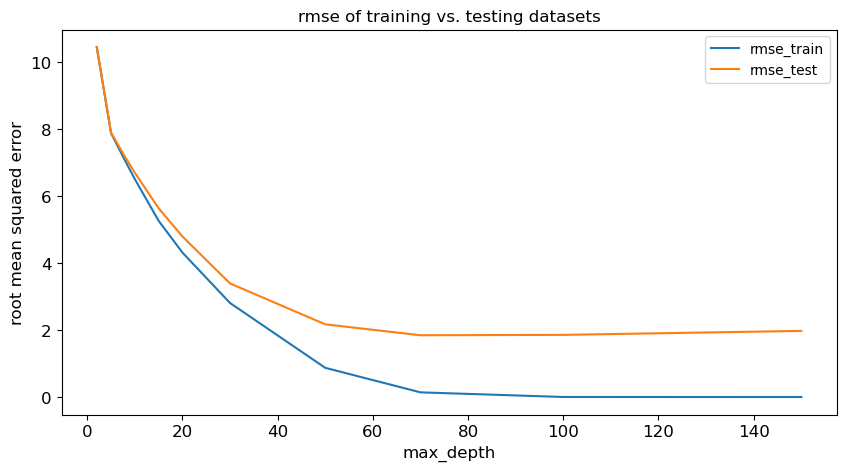

In [273]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10, 5), title = 'rmse of training vs. testing datasets', fontsize=12, x='max_depth', y=['rmse_train', 'rmse_test'])
ax.set_xlabel('max_depth', fontsize=12)
ax.set_ylabel('root mean squared error', fontsize=12)

**Underfitting**

Underfitting is when the model cannot capture the data's pattern at all

In [279]:
x_train_underfit = x_train
y_train_underfit = y_train

x_test_underfit = x_test
y_test_underfit = y_test

In [280]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(x_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(x_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 7.037874182424041
mean_squared_error 141.6070239220214
root_mean_squared_error 11.899874954049785
r2 0.5211999778267024


In [282]:
# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(x_test_underfit)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 7.0355227903809725
mean_squared_error 141.7285034892435
root_mean_squared_error 11.904978096966138
r2 0.519143482704608


### 7.2 Random Forest

[back to top](#top)

In [283]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(x_train, y_train)

RandomForestRegressor()

In [284]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 0.3971373312438995
mean_squared_error 2.542134551752493
root_mean_squared_error 1.5944072728611385
r2 0.9913750449841957


<Axes: xlabel='true', ylabel='pred'>

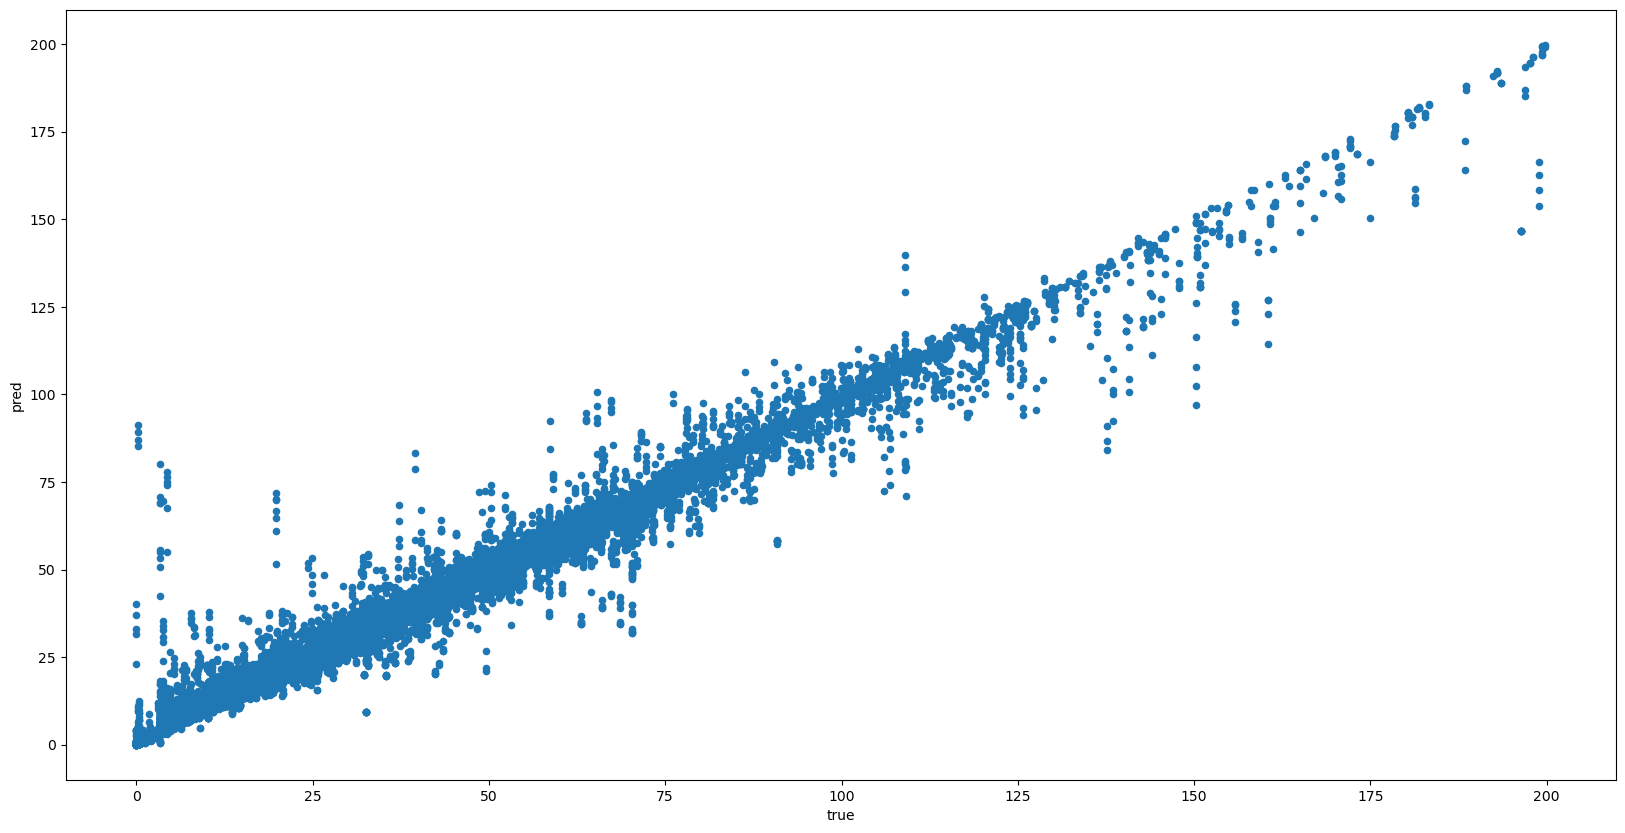

In [287]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### 7.3 Gradient boosting

[back to top](#top)

In [288]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(x_train, y_train)

GradientBoostingRegressor()

In [289]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 3.235350780052073
mean_squared_error 50.33505972508548
root_mean_squared_error 7.094720552994704
r2 0.8292231913738006


<Axes: xlabel='true', ylabel='pred'>

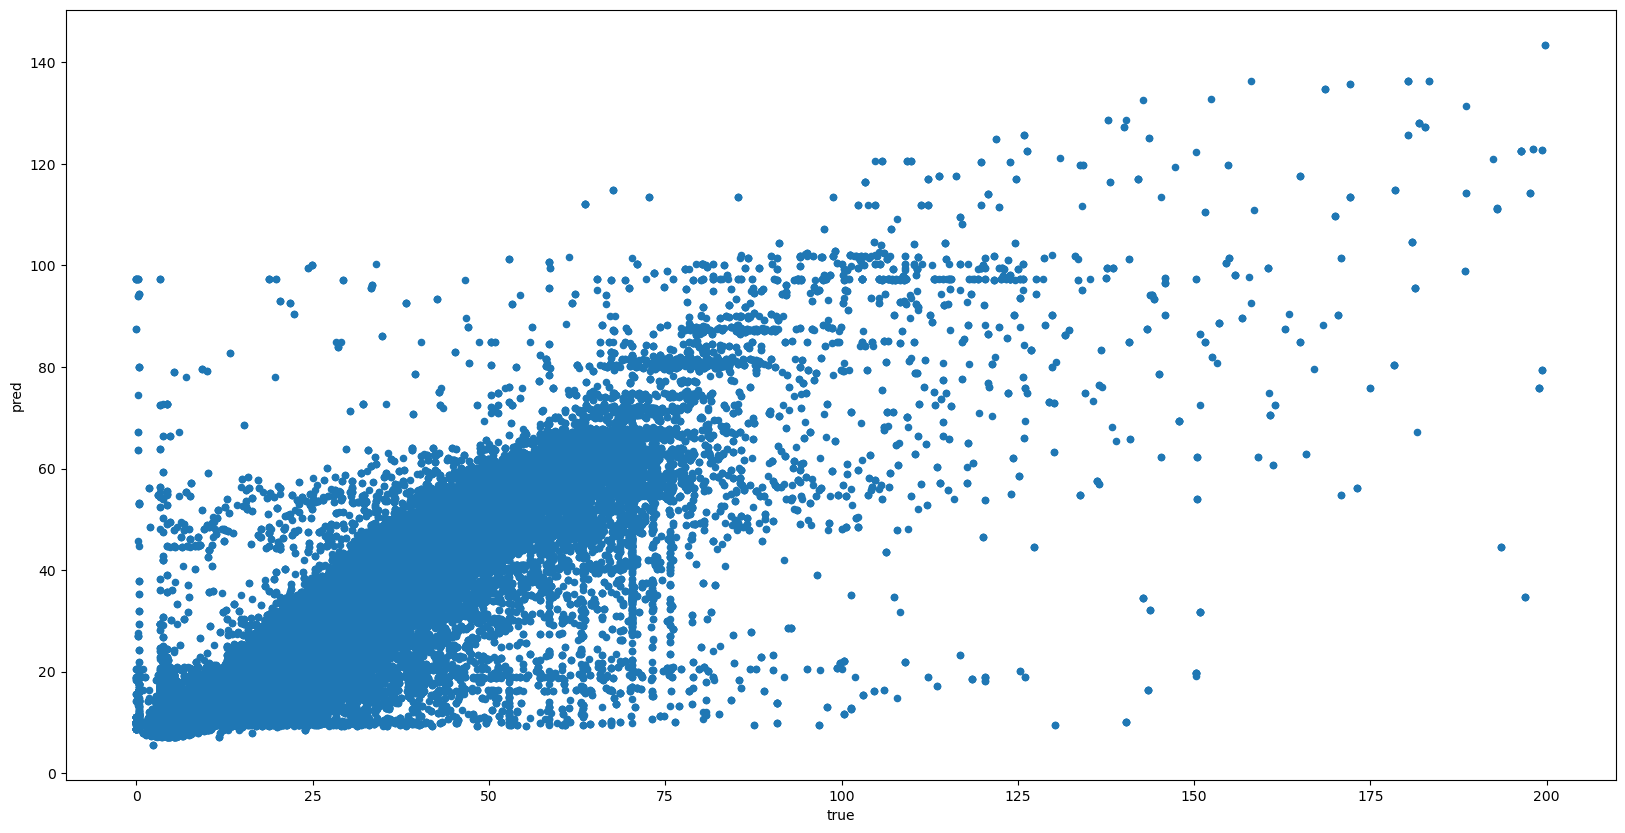

In [291]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

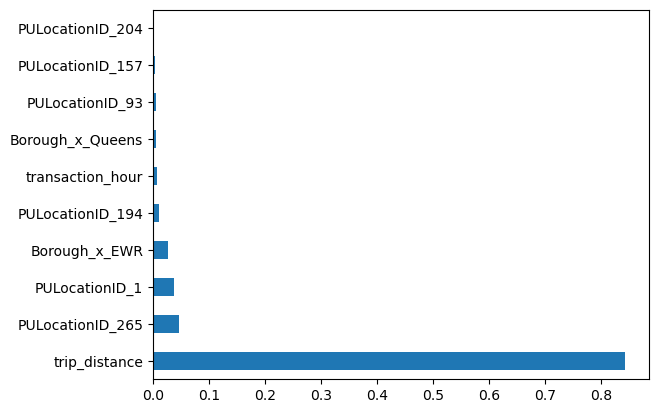

In [292]:
(pd.Series(model_at_hand.feature_importances_, index=x_train.columns)
    .nlargest(10)
    .plot(kind='barh'))

### 7.4 Comparing algorithm performances

[back to top](#top)

| Metric                        | Decision Tree          | RandomForestRegressor    | GradBooster              |
|-------------------------------|------------------------|--------------------------|--------------------------|
| **Mean Absolute Error (MAE)**  | 0.0718                 | 0.3971                   | 3.2354                   |
| **Mean Squared Error (MSE)**   | 3.3562                 | 2.5421                   | 50.3351                  |
| **Root Mean Squared Error (RMSE)** | 1.8320            | 1.5944                   | 7.0947                   |
| **R² Score**                   | 0.9886                 | 0.9914                   | 0.8292                   |


### 8. Tuning

[back to top](#top)

### 8.1. Find best parameters <a id='find_best_parameters'></a>

In [294]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [295]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [298]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Daniel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
14 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Daniel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Daniel\anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Daniel\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Daniel\anaconda3\lib\site-packa

In [299]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1094.851685,13.785423,94.703650,1.056354,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.901224,0.905200,0.905849,0.904091,0.002044,1
1,369.121112,1.583365,13.290052,0.535830,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.725876,0.727879,0.722283,0.725346,0.002315,2
2,451.167102,22.956991,13.723790,0.367318,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.717396,0.716923,0.705084,0.713134,0.005696,3
3,0.518432,0.036103,0.000000,0.000000,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,5
4,0.522221,0.036413,0.000000,0.000000,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,5
5,3160.950072,899.050599,0.000000,0.000000,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",NaN,NaN,NaN,NaN,NaN,5
6,1120.375199,23.532934,34.510877,0.902519,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.538004,0.551072,0.552865,0.547314,0.006623,4
7,3521.355298,393.032981,101.551625,71.820603,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",NaN,0.812481,0.808561,NaN,NaN,5
8,0.647585,0.027297,0.000000,0.000000,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,5
9,2505.238599,204.746470,90.734839,65.586068,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",NaN,0.891234,0.889180,NaN,NaN,5


In [300]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=1800,min_samples_split= 2,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(x_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  3569.9849059581757  seconds
mean_absolute_error 2.983116649173726
mean_squared_error 42.52759604941796
root_mean_squared_error 6.521318582113433
r2 0.8557123569231758


In [303]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(x_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(x_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  949.9755640029907  seconds
mean_absolute_error 2.669918380345812
mean_squared_error 34.472591894511076
root_mean_squared_error 5.871336465789631
r2 0.8830413778989911


In [ ]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### Bonus: Classification

[back to top](#top)

In [ ]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [ ]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()

In [ ]:
nyc_class['earning_class'].value_counts()

In [ ]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'earning_class_binary'

In [ ]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

In [ ]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

### 

[back to top](#top)